In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, skew, skewtest, kurtosis, kurtosistest, ppcc_plot, ppcc_max
from pandas.tools.plotting import lag_plot, bootstrap_plot

In [13]:
%matplotlib inline

In [14]:
df = pd.read_csv('mapping.csv')
df2 = pd.read_csv('cleaned_report_results.csv')

In [15]:
df2.columns

Index([u'report_id', u'risk', u'phone_num', u'insp_date', u'insp_timein',
       u'insp_timeout', u'insp_name', u'insp_badge'],
      dtype='object')

In [16]:
df2 = df2.drop(u'phone_num', axis = 1)
df2 = df2.drop(u'insp_date', axis = 1)
df2 = df2.drop(u'insp_timein', axis = 1)
df2 = df2.drop(u'insp_timeout', axis = 1)
df2 = df2.drop(u'insp_name', axis = 1)
df2.head()

,report_id,risk,insp_badge
0,105164,3,54.0
1,105166,3,54.0
2,105169,3,54.0
3,105178,3,54.0
4,105185,4,54.0


In [17]:
df2 = df2.rename(columns = {'report_id' : 'inspec_id'})
df2.head()

,inspec_id,risk,insp_badge
0,105164,3,54.0
1,105166,3,54.0
2,105169,3,54.0
3,105178,3,54.0
4,105185,4,54.0


In [18]:
df.head()

,inspec_id,permit_id,insp_date_x,insp_timein,insp_type,crit_viol,non_crit_viol,crit_viol_cos,crit_viol_rpt,non_crit_viol_cos,non_crit_viol_rpt,crit_viol_tbr,non_crit_viol_tbr,lat,lon
0,105164,5853,2013-06-12,18:20:00,Routine,5.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,38.919840,-77.041410
1,105166,3794,2013-06-12,14:45:00,Routine,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,38.917577,-77.022163
2,204568,3794,2014-06-18,12:06:00,Routine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.917577,-77.022163
3,610684,3794,2015-03-18,10:40:00,Routine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.917577,-77.022163
4,823545,3794,2016-04-04,10:00:00,Routine,3.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,38.917577,-77.022163


In [19]:
df3 = df.merge(df2, on = 'inspec_id')
df3.head()

,inspec_id,permit_id,insp_date_x,insp_timein,insp_type,crit_viol,non_crit_viol,crit_viol_cos,crit_viol_rpt,non_crit_viol_cos,non_crit_viol_rpt,crit_viol_tbr,non_crit_viol_tbr,lat,lon,risk,insp_badge
0,105164,5853,2013-06-12,18:20:00,Routine,5.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,38.919840,-77.041410,3,54.0
1,105166,3794,2013-06-12,14:45:00,Routine,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,38.917577,-77.022163,3,54.0
2,204568,3794,2014-06-18,12:06:00,Routine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.917577,-77.022163,3,59.0
3,610684,3794,2015-03-18,10:40:00,Routine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.917577,-77.022163,3,59.0
4,823545,3794,2016-04-04,10:00:00,Routine,3.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,38.917577,-77.022163,3,422.0


In [20]:
df3.to_csv('mapping_merged_cleaned_report_results.csv')

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1977 entries, 0 to 1976
Data columns (total 17 columns):
inspec_id            1977 non-null int64
permit_id            1977 non-null int64
insp_date_x          1977 non-null object
insp_timein          1977 non-null object
insp_type            1977 non-null object
crit_viol            1977 non-null float64
non_crit_viol        1977 non-null float64
crit_viol_cos        1977 non-null float64
crit_viol_rpt        1977 non-null float64
non_crit_viol_cos    1977 non-null float64
non_crit_viol_rpt    1977 non-null float64
crit_viol_tbr        1977 non-null float64
non_crit_viol_tbr    1977 non-null float64
lat                  1977 non-null float64
lon                  1977 non-null float64
risk                 1977 non-null int64
insp_badge           1976 non-null float64
dtypes: float64(11), int64(3), object(3)
memory usage: 278.0+ KB


In [22]:
df3.describe()

,inspec_id,permit_id,crit_viol,non_crit_viol,crit_viol_cos,crit_viol_rpt,non_crit_viol_cos,non_crit_viol_rpt,crit_viol_tbr,non_crit_viol_tbr,lat,lon,risk,insp_badge
count,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.00000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1976.000000
mean,517700.486090,41921.192210,4.089530,1.992413,1.617097,0.03743,0.292868,0.026302,2.472433,1.699545,38.908070,-77.040674,2.902883,245.644231
std,275549.954583,67181.929734,2.932365,1.800653,1.637606,0.23938,0.582048,0.183632,2.384238,1.680673,0.033894,0.287468,0.636823,244.899856
min,105164.000000,532.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,38.831741,-84.384267,0.000000,16.000000
25%,202634.000000,2600.000000,2.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,38.897508,-77.044423,3.000000,59.000000
50%,607187.000000,4520.000000,3.000000,2.000000,1.000000,0.00000,0.000000,0.000000,2.000000,1.000000,38.902878,-77.028725,3.000000,89.000000
75%,813221.000000,7219.000000,6.000000,3.000000,2.000000,0.00000,0.000000,0.000000,4.000000,3.000000,38.916840,-77.015436,3.000000,603.000000
max,825329.000000,188740.000000,22.000000,12.000000,11.000000,3.00000,4.000000,2.000000,21.000000,12.000000,39.621380,-76.937156,5.000000,650.000000


In [23]:
df3.isnull().sum()

inspec_id            0
permit_id            0
insp_date_x          0
insp_timein          0
insp_type            0
crit_viol            0
non_crit_viol        0
crit_viol_cos        0
crit_viol_rpt        0
non_crit_viol_cos    0
non_crit_viol_rpt    0
crit_viol_tbr        0
non_crit_viol_tbr    0
lat                  0
lon                  0
risk                 0
insp_badge           1
dtype: int64

inspec_id
Skew:  -0.112
Skew test:  SkewtestResult(statistic=-2.0018978595425128, pvalue=0.045295717922364455)
Kurtosis:  -1.732
Kurtosis test:  KurtosistestResult(statistic=0.0, pvalue=1.0)
 
PPCC_max value:  1.458


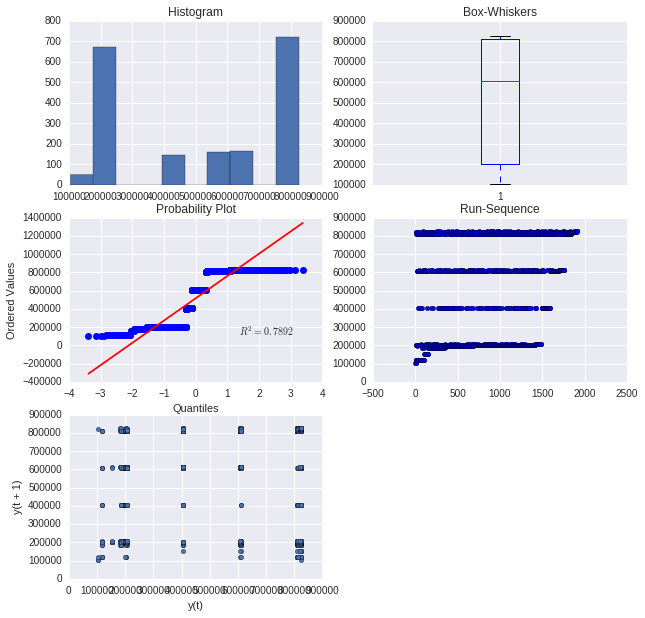

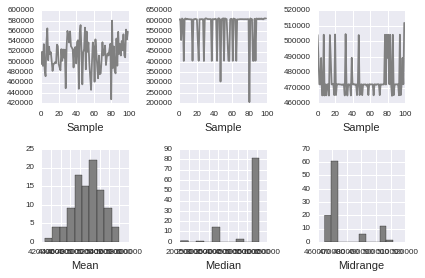

permit_id
Skew:  1.23
Skew test:  SkewtestResult(statistic=17.567256183698895, pvalue=4.3889232115694337e-69)
Kurtosis:  -0.403
Kurtosis test:  KurtosistestResult(statistic=-4.4744638909867307, pvalue=7.6603270171719369e-06)
 
PPCC_max value:  4.077


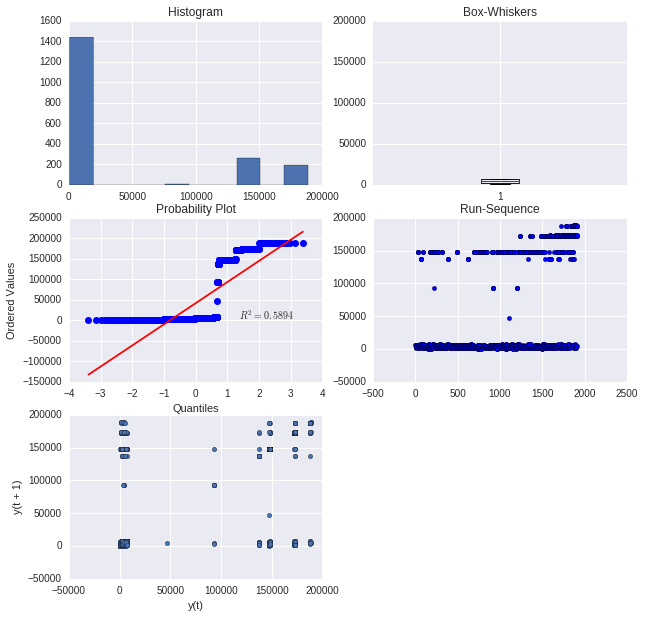

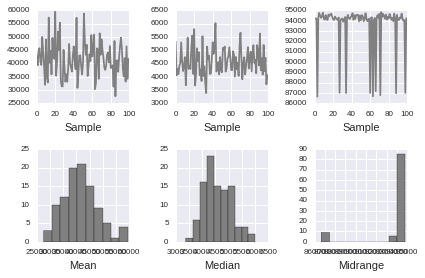

In [48]:
#First pass for looking at frequency costs as a function of column, testing data for normality,
# testing data for randomness, analyzing uncertainity of mean, median, and midrange values

for i in df3.iloc[:, 0:2]:
    print i 
    print "Skew: ", round(skew(df3.iloc[:, 0:2][i]),3)
    print "Skew test: ", skewtest(df3.iloc[:, 0:2][i])
    print "Kurtosis: ", round(kurtosis(df3.iloc[:, 0:2][i]),3)
    print "Kurtosis test: ", kurtosistest(df3.iloc[:, 0:2][i])
    print " "
    print "PPCC_max value: ", round(ppcc_max(df3.iloc[:, 0:2][i], brack = (-10,10)),3)
    #www.itl.nist.gov/div898/handbook/eda/section3/ppccplot.htm
    #ppcc_max~0.14 indicates a normal distribution. Less than 0.14 indicates long-tailed distributions (Cauchy).
    #Greater than 0.14 indicates short-tailed distributions (Beta or uniform).
    
    plt.figure(1, figsize = (10,10), dpi = 80)
    #histogram plot
    plt.subplot(321)
    plt.title("Histogram")
    plt.hist(df3.iloc[:, 0:2][i])
    
    #box and whiskers plot 
    plt.subplot(322)
    plt.title("Box-Whiskers")
    plt.boxplot(df3.iloc[:, 0:2][i])
    
    #normal probability plot - test for normality
    plt.subplot(323)
    plt.title("Normal Probability Test")
    probplot(df3.iloc[:, 0:2][i], plot=plt)
    
    #run-sequence plot - test for outliers, and shifts in location and variation
    plt.subplot(324)
    plt.title("Run-Sequence")
    plt.scatter(df3.iloc[:, 0:2][i].index, df3.iloc[:, 0:2][i])
    
    #lag plot - test for randomness
    plt.subplot(325)
    #plt.title("Lag")
    lag_plot(df3.iloc[:, 0:2][i])
    
    #bootstrap plot - test for uncertainity of mean, median, and midrange
    bootstrap_plot(df3.iloc[:, 0:2][i], size = 100, samples = 100, color = 'grey')
    
    plt.tight_layout()
    plt.show()

crit_viol
Skew:  1.099
Skew test:  SkewtestResult(statistic=16.218414616630767, pvalue=3.7371721676574283e-59)
Kurtosis:  1.25
Kurtosis test:  KurtosistestResult(statistic=7.2177547779541396, pvalue=5.2852911865735089e-13)
 
PPCC_max value:  4.165


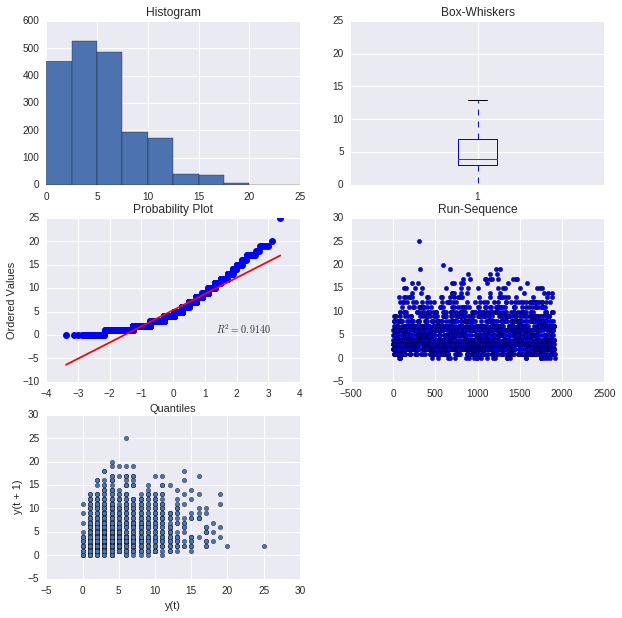

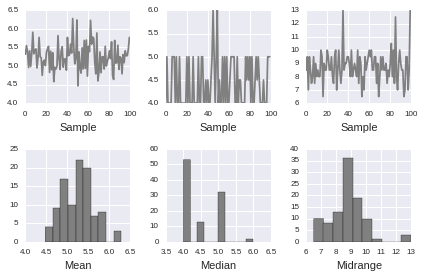

non_crit_viol
Skew:  1.12
Skew test:  SkewtestResult(statistic=16.439680801525625, pvalue=9.9441301104337067e-61)
Kurtosis:  1.462
Kurtosis test:  KurtosistestResult(statistic=7.9735199840386892, pvalue=1.5421766222874471e-15)
 
PPCC_max value:  3.295


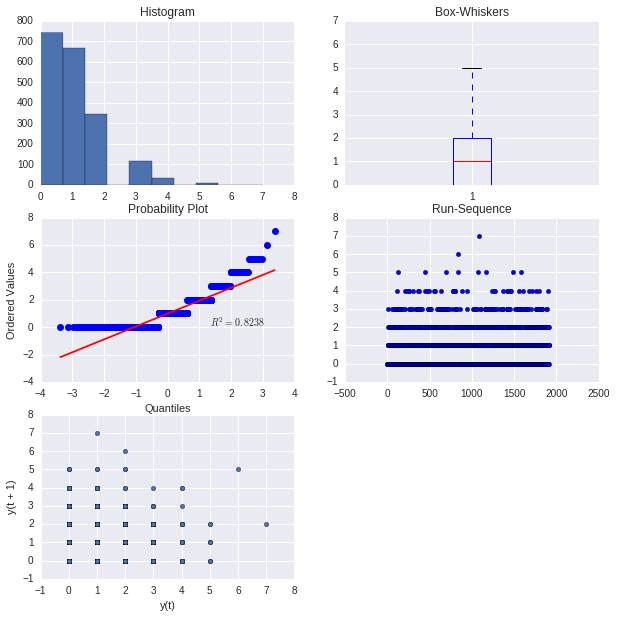

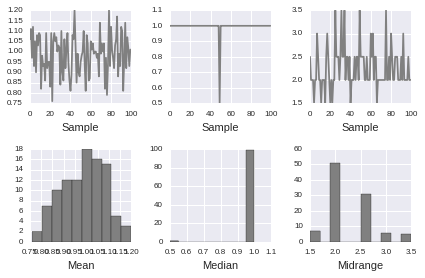

crit_viol_cos
Skew:  1.478
Skew test:  SkewtestResult(statistic=19.875531673286105, pvalue=6.6280602216451829e-88)
Kurtosis:  3.224
Kurtosis test:  KurtosistestResult(statistic=12.235208471484004, pvalue=2.0158661147625948e-34)
 
PPCC_max value:  4.348


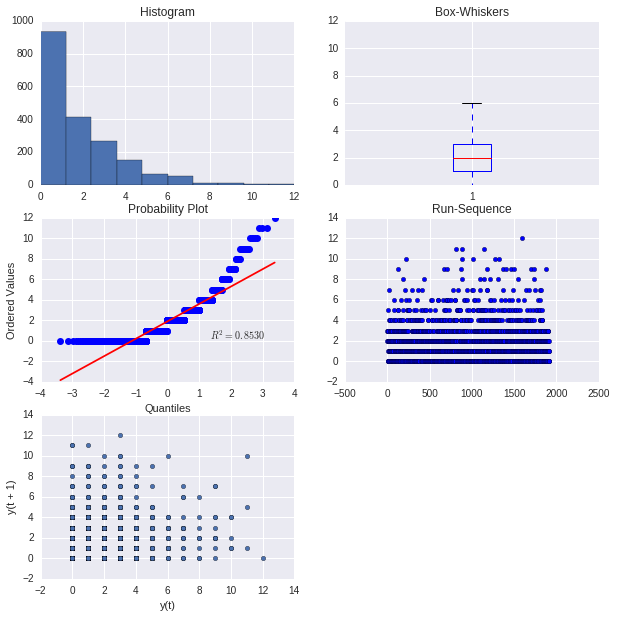

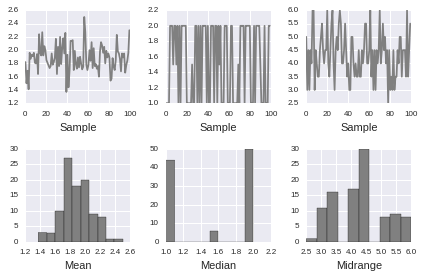

crit_viol_rpt
Skew:  8.045
Skew test:  SkewtestResult(statistic=43.837700448951658, pvalue=0.0)
Kurtosis:  76.946
Kurtosis test:  KurtosistestResult(statistic=27.054719741292299, pvalue=3.3610567837741073e-161)
 
PPCC_max value:  71.475


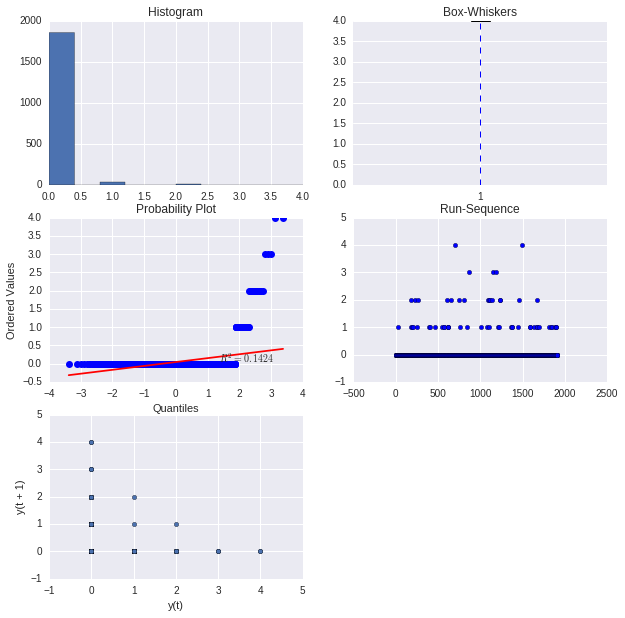

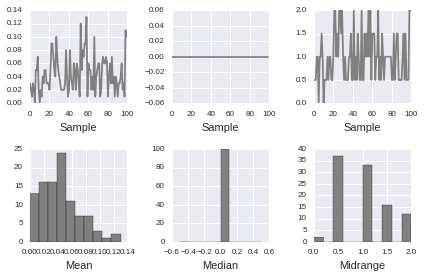

non_crit_viol_cos
Skew:  3.741
Skew test:  SkewtestResult(statistic=32.70220919983533, pvalue=1.4528128881346508e-234)
Kurtosis:  14.048
Kurtosis test:  KurtosistestResult(statistic=20.29293836721661, pvalue=1.4845201446562578e-91)
 
PPCC_max value:  18.704


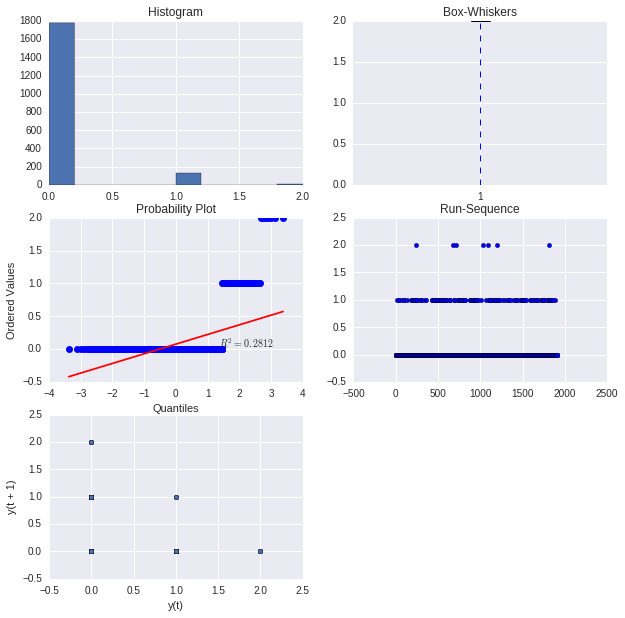

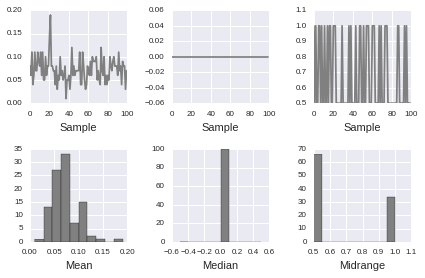

non_crit_viol_rpt
Skew:  7.982
Skew test:  SkewtestResult(statistic=43.722126548173399, pvalue=0.0)
Kurtosis:  70.344
Kurtosis test:  KurtosistestResult(statistic=26.774726087604698, pvalue=6.3650770074919557e-158)
 
PPCC_max value:  76.57


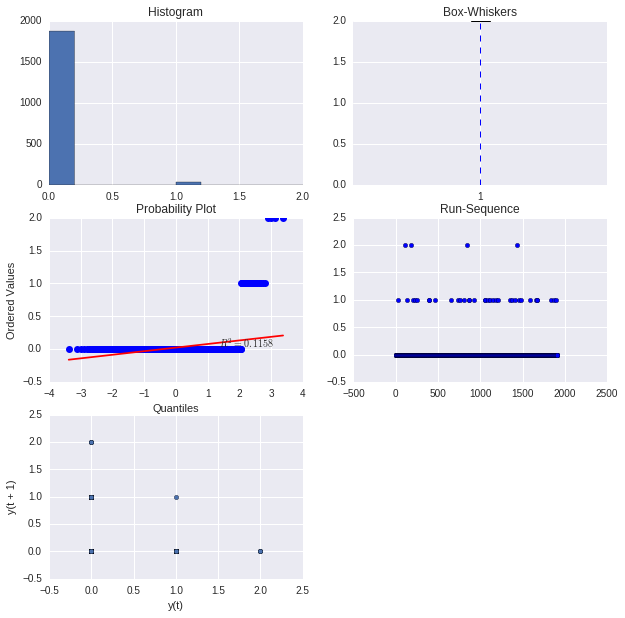

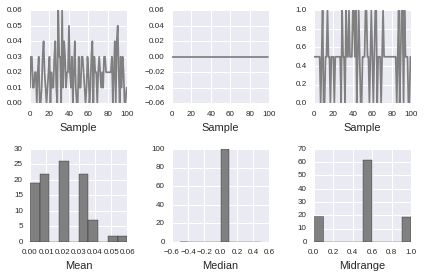

crit_viol_tbr
Skew:  1.337
Skew test:  SkewtestResult(statistic=18.605304458071316, pvalue=2.9103367785774711e-77)
Kurtosis:  3.014
Kurtosis test:  KurtosistestResult(statistic=11.852323811791276, pvalue=2.0930486307654648e-32)
 
PPCC_max value:  3.922


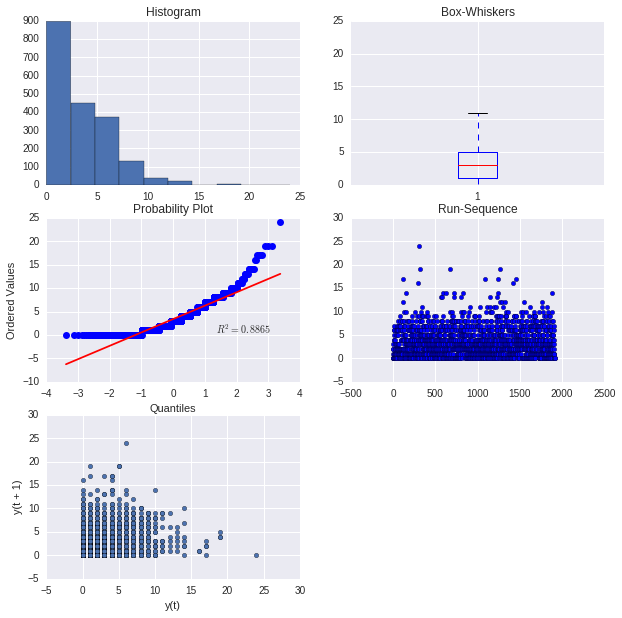

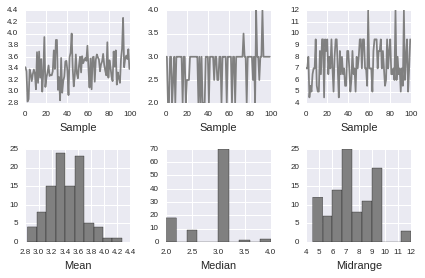

non_crit_viol_tbr
Skew:  1.219
Skew test:  SkewtestResult(statistic=17.461127783136934, pvalue=2.8328200747797768e-68)
Kurtosis:  1.737
Kurtosis test:  KurtosistestResult(statistic=8.8453162501369231, pvalue=9.1269453188716367e-19)
 
PPCC_max value:  3.152


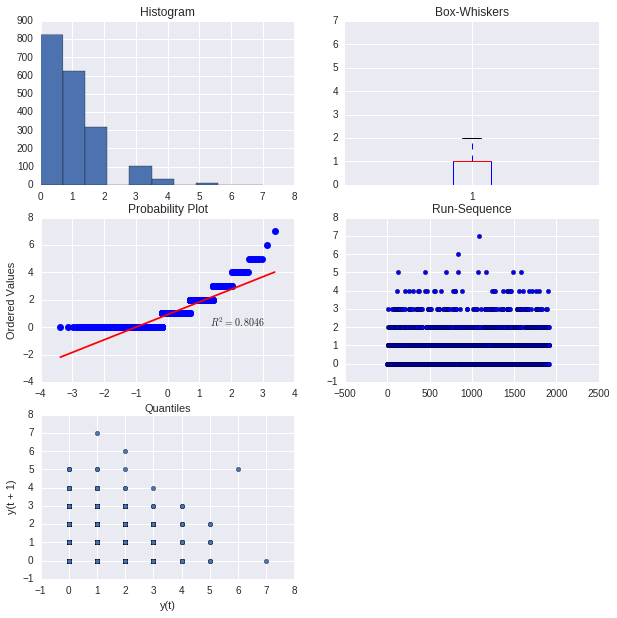

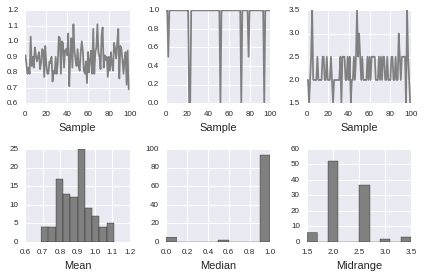

lat
Skew:  14.166
Skew test:  SkewtestResult(statistic=52.140463107282159, pvalue=0.0)
Kurtosis:  290.801
Kurtosis test:  KurtosistestResult(statistic=30.393144453748544, pvalue=6.767088414478001e-203)
 
PPCC_max value:  12.314


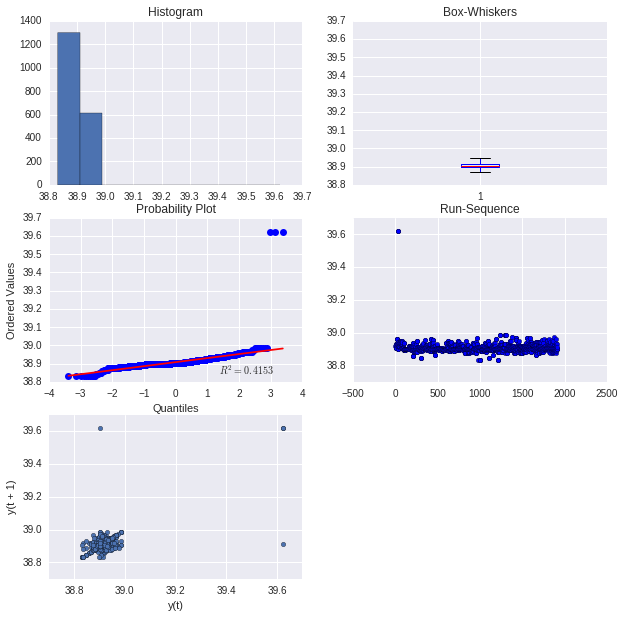

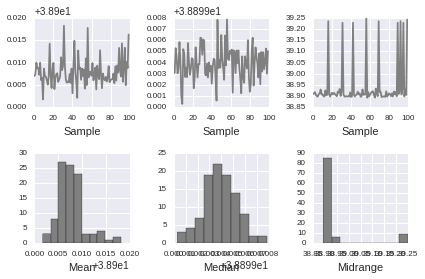

lon
Skew:  -24.908
Skew test:  SkewtestResult(statistic=-60.440239111062944, pvalue=0.0)
Kurtosis:  623.131
Kurtosis test:  KurtosistestResult(statistic=31.748415706512723, pvalue=3.3392017616000706e-221)
 
PPCC_max value:  -0.924


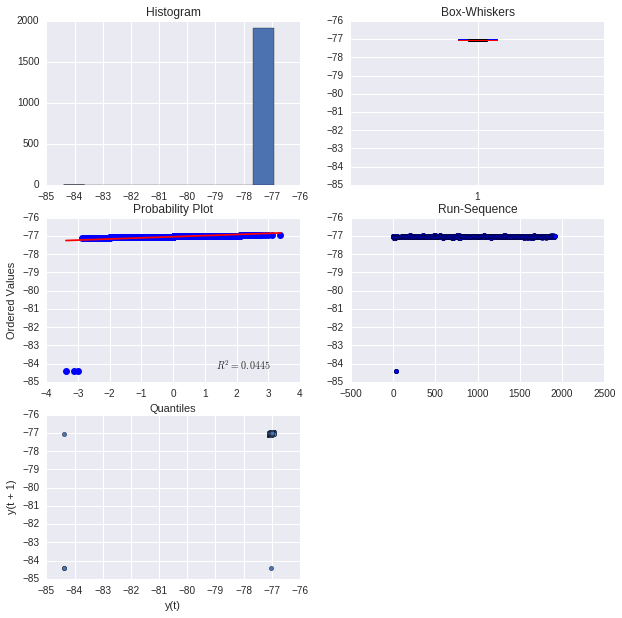

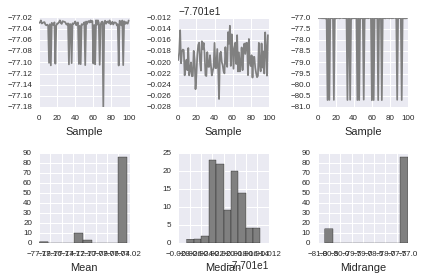

risk
Skew:  0.369
Skew test:  SkewtestResult(statistic=6.4078079608921641, pvalue=1.4762668800543193e-10)
Kurtosis:  3.023
Kurtosis test:  KurtosistestResult(statistic=11.870173926107094, pvalue=1.6911567969813391e-32)
 
PPCC_max value:  9.343


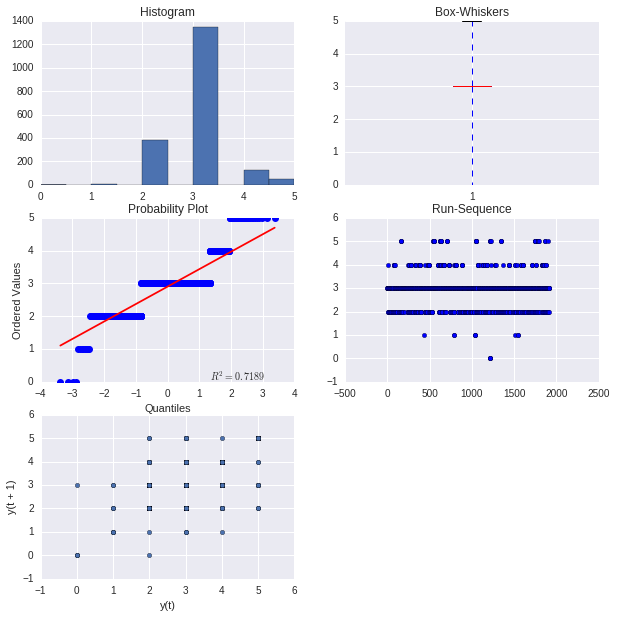

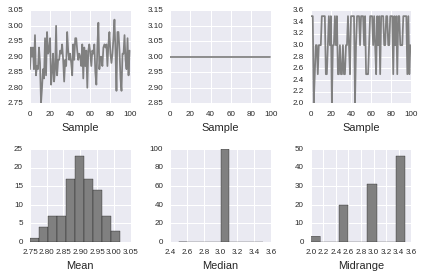

insp_badge
Skew:  0.722
Skew test:  SkewtestResult(statistic=11.684086783757303, pvalue=1.5372286492520372e-31)
Kurtosis:  -1.354
Kurtosis test:  KurtosistestResult(statistic=0.0, pvalue=1.0)
 
PPCC_max value:  1.442


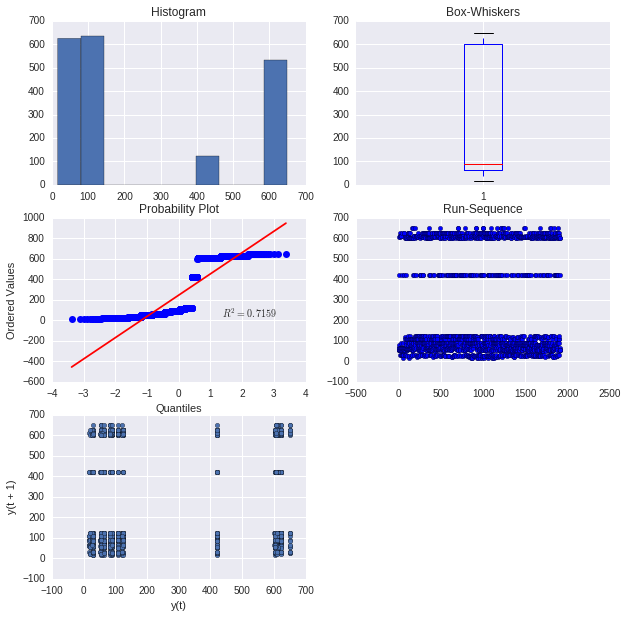

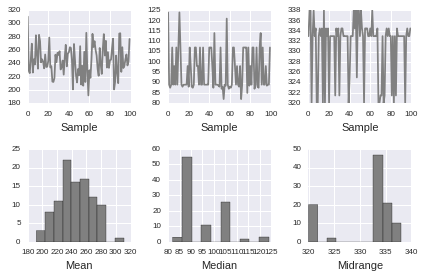

In [49]:
#First pass for looking at frequency costs as a function of column, testing data for normality,
# testing data for randomness, analyzing uncertainity of mean, median, and midrange values

for i in df5.iloc[:, 5:17]:
    print i 
    print "Skew: ", round(skew(df5.iloc[:, 5:17][i]),3)
    print "Skew test: ", skewtest(df5.iloc[:, 5:17][i])
    print "Kurtosis: ", round(kurtosis(df5.iloc[:, 5:17][i]),3)
    print "Kurtosis test: ", kurtosistest(df5.iloc[:, 5:17][i])
    print " "
    print "PPCC_max value: ", round(ppcc_max(df5.iloc[:, 5:17][i], brack = (-10,10)),3)
    #www.itl.nist.gov/div898/handbook/eda/section3/ppccplot.htm
    #ppcc_max~0.14 indicates a normal distribution. Less than 0.14 indicates long-tailed distributions (Cauchy).
    #Greater than 0.14 indicates short-tailed distributions (Beta or uniform).
    
    plt.figure(1, figsize = (10,10), dpi = 80)
    #histogram plot
    plt.subplot(321)
    plt.title("Histogram")
    plt.hist(df3.iloc[:, 5:17][i])
    
    #box and whiskers plot 
    plt.subplot(322)
    plt.title("Box-Whiskers")
    plt.boxplot(df3.iloc[:, 5:17][i])
    
    #normal probability plot - test for normality
    plt.subplot(323)
    plt.title("Normal Probability Test")
    probplot(df3.iloc[:, 5:17][i], plot=plt)
    
    #run-sequence plot - test for outliers, and shifts in location and variation
    plt.subplot(324)
    plt.title("Run-Sequence")
    plt.scatter(df3.iloc[:, 5:17][i].index, df3.iloc[:, 5:17][i])
    
    #lag plot - test for randomness
    plt.subplot(325)
    #plt.title("Lag")
    lag_plot(df3.iloc[:, 5:17][i])
    
    #bootstrap plot - test for uncertainity of mean, median, and midrange
    bootstrap_plot(df3.iloc[:, 5:17][i], size = 100, samples = 100, color = 'grey')
    
    plt.tight_layout()
    plt.show()

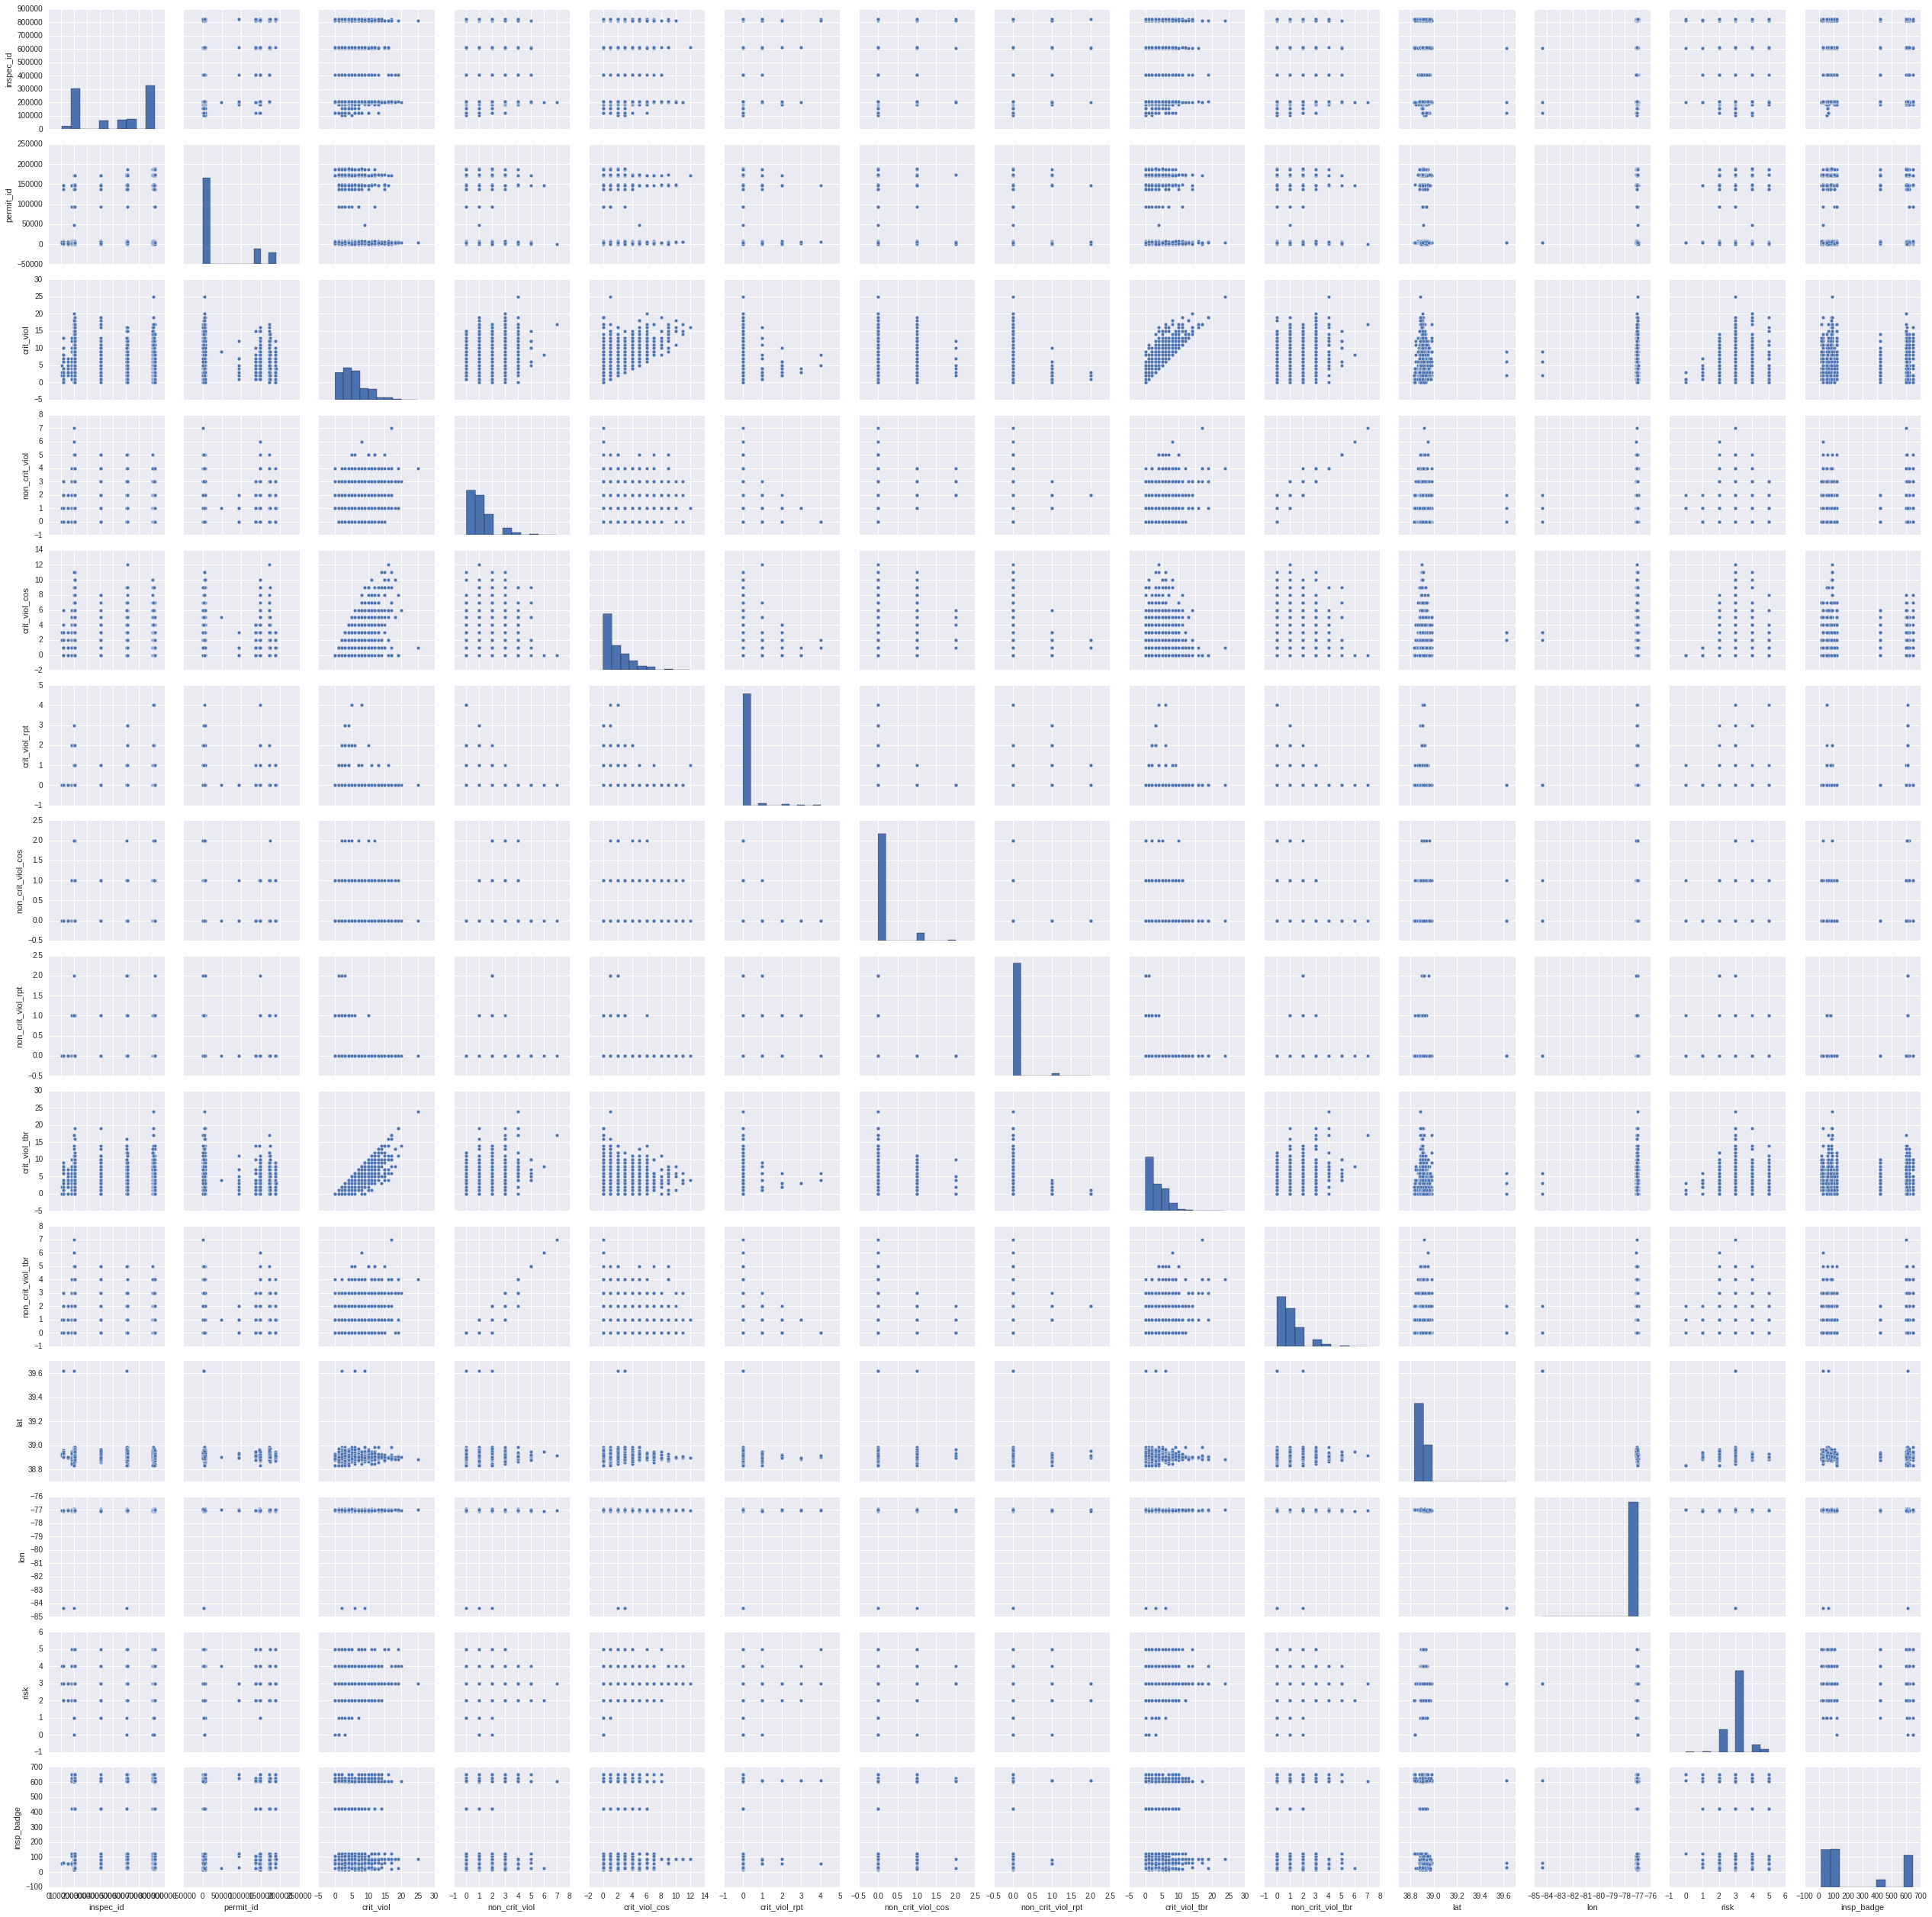

In [50]:
sns.pairplot(df3)

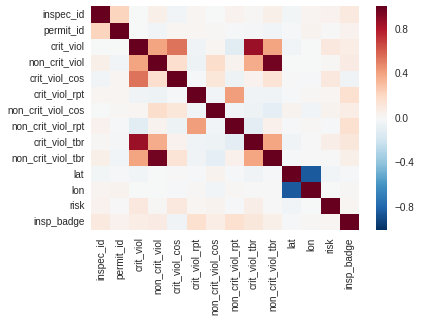

In [51]:
sns.heatmap(df3.corr())